# Basic Tutorial: Reeb graph class

In [2]:
from cereeberus import ReebGraph

In [3]:
import networkx as nx
import cereeberus.data.ex_graphs as ex_graph
import cereeberus.data.ex_reebgraphs as ex_rg
import matplotlib.pyplot as plt



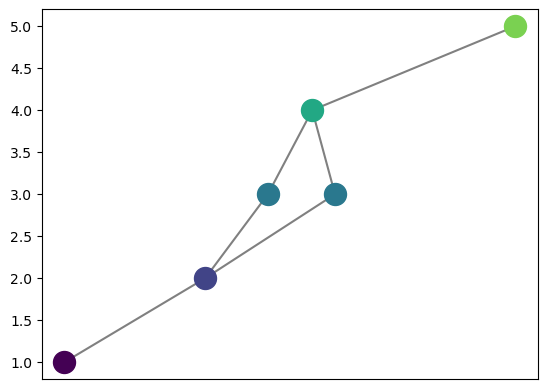

In [4]:
# Version with an example graph 
H = ex_graph.torus_graph()
G = ReebGraph(H, seed = 48864)

G.draw()

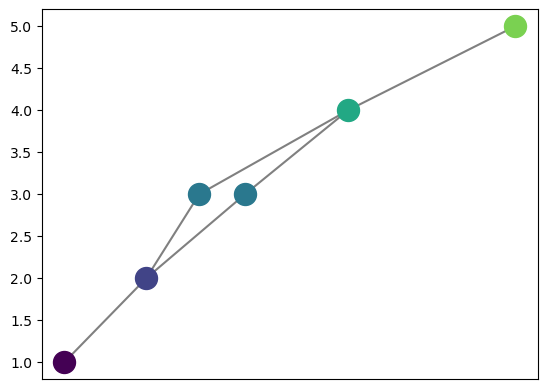

In [5]:
G = ex_rg.torus(seed = 17)
G.draw()

In [6]:
for e in G.edges:
    print(e)
    print(G.f[e[0]] < G.f[e[1]])

(0, 1, 0)
True
(1, 2, 0)
True
(1, 3, 0)
True
(2, 4, 0)
True
(3, 4, 0)
True
(4, 5, 0)
True


In [7]:
for v in G.nodes():
    print(v, G.in_degree(v), G.out_degree(v))

0 0 1
1 1 2
2 1 1
3 1 1
4 2 1
5 1 0


In [8]:
G.add_edge(0,3)
G.add_node('chicken', 3.5)
G.set_pos_from_f()

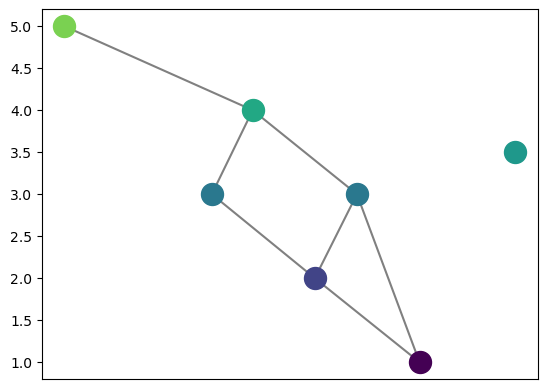

In [9]:
G.draw()

In [10]:
for v in nx.isolates(G):
    print(v)

chicken


In [11]:
G.remove_all_regular_vertices()

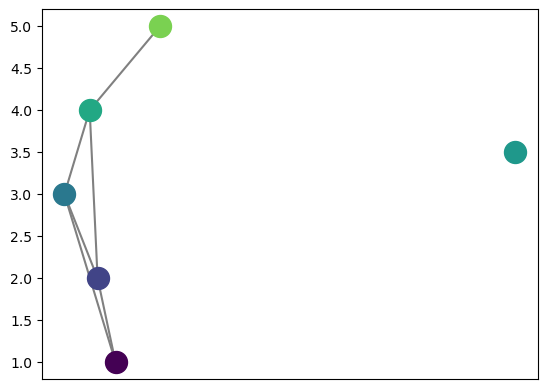

In [12]:
G.draw()

<Axes: >

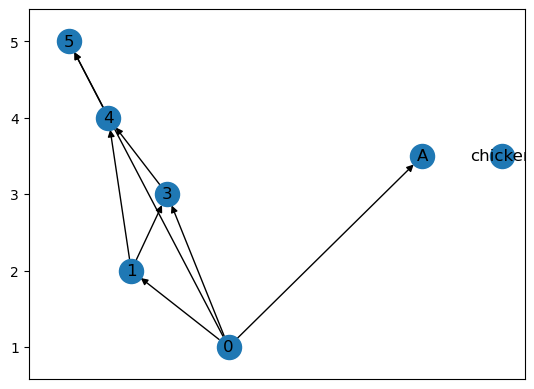

In [13]:
G.add_node('A', 3.5)
G.add_edge('A', 0)
G.add_edge(0,5)
G.set_pos_from_f(seed = 48864)
G.draw_straight_line(with_labels = True)

In [14]:
print(set(G.f.keys()) == set(G.nodes()))
print(G.f.keys())
print(G.nodes())

True
dict_keys([0, 1, 3, 4, 5, 'chicken', 'A'])
[0, 1, 3, 4, 5, 'chicken', 'A']


<Axes: >

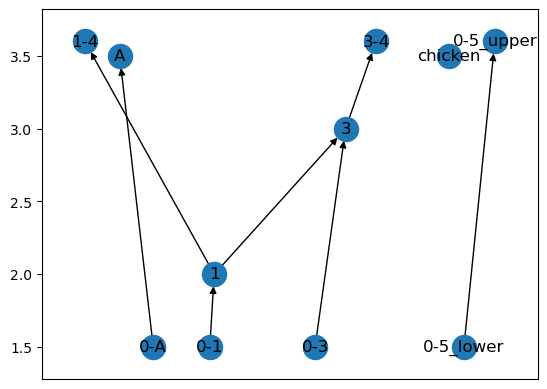

In [15]:
H = G.slice(1.5,3.6)
H.draw_straight_line(with_labels = True)

In [16]:
H.number_connected_components()

4

In [17]:
for v_list in H.connected_components():
    print(v_list)
    print(type(v_list))
    break

{1, 3, '3-4', '0-1', '0-3', '1-4'}
<class 'set'>


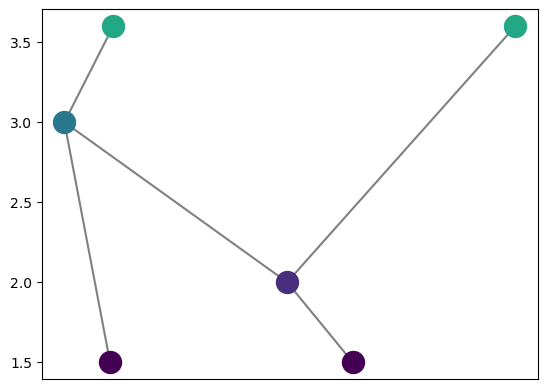

In [18]:
H_cc = H.induced_subgraph(v_list)
H_cc.draw()

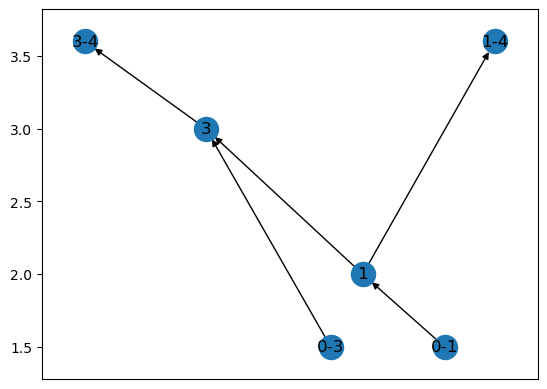

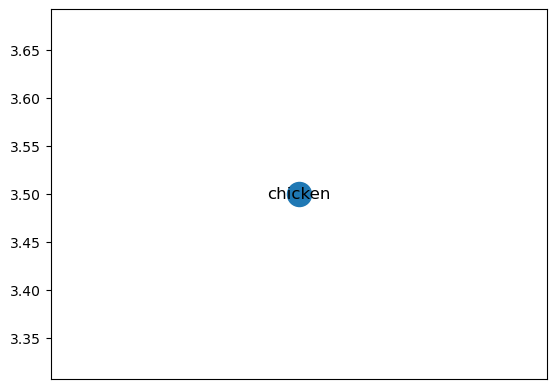

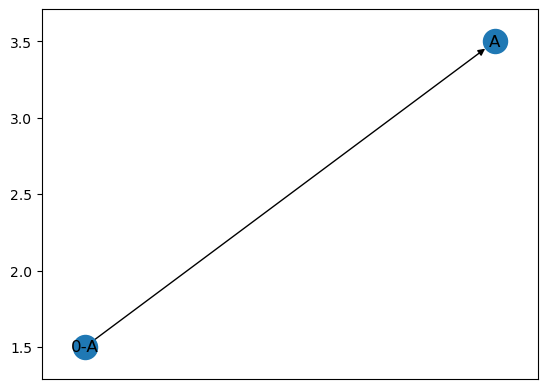

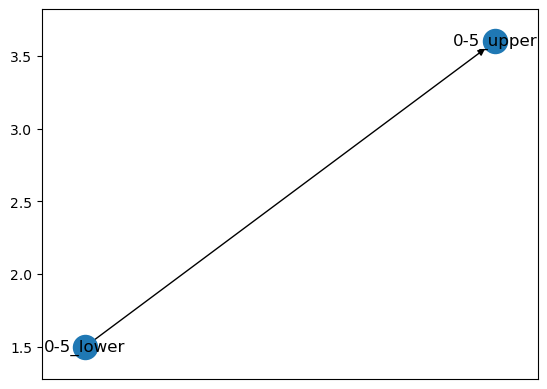

In [20]:
for v_list in H.connected_components():
    H_cc = H.induced_subgraph(v_list)
    H_cc.draw_straight_line(with_labels = True)

In [18]:
H.f

{1: 2,
 3: 3,
 'chicken': 3.5,
 'A': 3.5,
 '0-1': 1.5,
 '0-3': 1.5,
 '0-A': 1.5,
 '1-4': 3.6,
 '3-4': 3.6,
 '0-5_lower': 1.5,
 '0-5_upper': 3.6}

In [19]:
H_cc = ReebGraph()
H_cc.add_nodes_from(v_list, H.f)
print(H_cc)

ReebGraph with 6 nodes and 0 edges.


In [20]:

e_list = [edge for edge in H.edges() if edge[0] in v_list and edge[1] in v_list]
print(e_list)


[(1, 3), (1, '1-4'), (3, '3-4'), ('0-1', 1), ('0-3', 3)]


In [22]:
for e in e_list:
    H_cc.add_edge(e[0], e[1])
print(H_cc)

ReebGraph with 6 nodes and 6 edges.


In [21]:

H_cc.add_edges_from(e_list)
print(H_cc)

ReebGraph with 6 nodes and 5 edges.


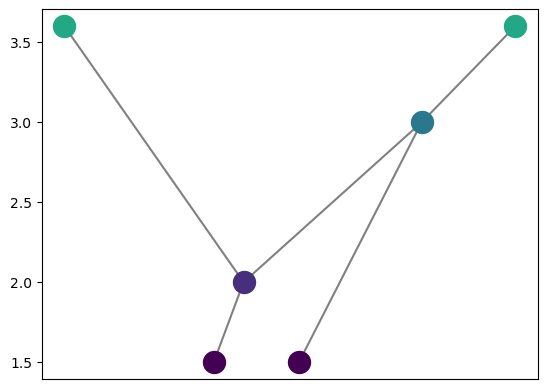

In [22]:
H_cc.draw()

## Getting slicing working 

In [26]:
# Going to get the slice of the reeb graph with f \inv (a,b)
a = 2.5
b = 4.6 
int_type = 'open'

In [27]:
v_list = [v for v in G.nodes() if G.f[v] > a and G.f[v] < b]
v_list 

[3, 4, 'chicken', 'A']

In [28]:
e_list = [e for e in G.edges() if e[0] in v_list or e[1] in v_list ]

#Include the edges that cover the entire slice 
e_list.extend([e for e in G.edges() if G.f[e[0]]<a and G.f[e[1]]>b])
# e_list = ['-'.join([str(v) for v in edge]) for edge in e_list]
e_list

[(0, 3),
 (0, 'A'),
 (0, 'A'),
 (0, 'A'),
 (0, 'A'),
 (1, 3),
 (1, 4),
 (3, 4),
 (4, 5),
 (0, 5)]

<Axes: >

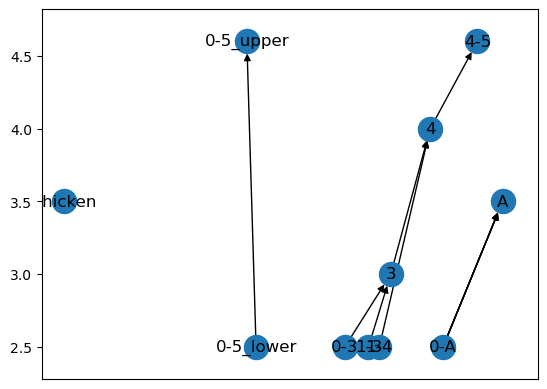

In [31]:
H = ReebGraph()

#TODO overwrite this function to take in the function list as well 
# H.add_nodes_from(v_list)
# H.f = {v: G.f[v] for v in v_list}
# H.set_pos_from_f()

for v in v_list:
    H.add_node(v, G.f[v])

for e in e_list:
    if e[0] in v_list and e[1] in v_list:
        H.add_edge(e[0], e[1])
    elif e[0] not in v_list and e[1] not in v_list:
        # The edge is entirely crossing the slice, so we add two vertices and an edge
        H.add_node('-'.join([str(v) for v in e])+'_lower', a)
        H.add_node('-'.join([str(v) for v in e])+'_upper', b)
        H.add_edge('-'.join([str(v) for v in e])+'_lower', '-'.join([str(v) for v in e])+'_upper')

        
         
    else:
        # Half the edge is included 

        # Make sure the edge is in order, so f(e[0]) < f(e[1])
        e = sorted(e, key = lambda x: G.f[x])

        # Make a name for the new vertex to create
        edge_name = '-'.join([str(v) for v in e])

        if e[0] in v_list:
            # The lower edge is in the set, so the other vertex must have 
            # value above the max 
            assert G.f[e[1]] > b
            vert_in = e[0]
            func_val = b

            # Add a new vertex called edge_name with value b
            H.add_node(edge_name, func_val)
            H.add_edge(e[0], edge_name)
        else:
            # The higher edge is in the set, so the other vertex must have 
            # value below the min 
            assert G.f[e[0]] < a
            vert_in = e[1]
            func_val = a

            # Add a new vertex called edge_name with value a
            H.add_node(edge_name, func_val)
            H.add_edge(edge_name, e[1])

H.set_pos_from_f(seed = 12)
H.draw_straight_line(with_labels = True)

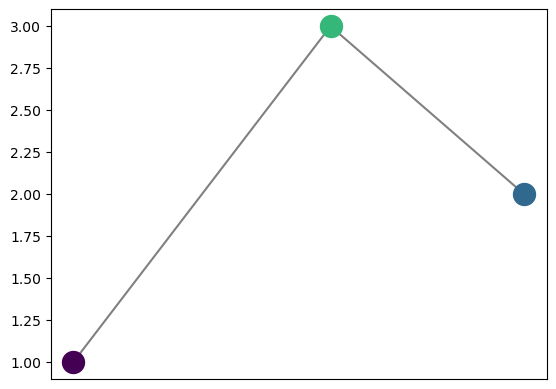

In [23]:
# Version starting with an empty graph

G = ReebGraph()
G.add_node(0,2)
G.add_node(1,3)
G.add_edge(0,1)
G.add_node('chicken', 1)
G.add_edge(1, 'chicken')
G.draw()

In [24]:
G.f['chicken']

1

In [25]:
H = graph_ex.torus_graph()
print(H)


NameError: name 'graph_ex' is not defined

In [ ]:
G = ReebGraph()

G.f = nx.get_node_attributes(H, 'fx')
G.f

{0: 1, 1: 2, 2: 3, 3: 3, 4: 4, 5: 5}

In [ ]:
for v in H.nodes:
    print(v)
    G.add_vertex(v, G.f[v], reset_pos=False)

[v for v in G.nodes]

0
1
2
3
4
5


[0, 1, 2, 3, 4, 5]

In [ ]:
for e in H.edges:
    e = e[:2]
    print(e)
    # Can't figure out why the graphs are outputting a 
    # 3rd part of the tuple from our examples
    edge = (e[0], e[1])
    G.add_edge(*edge, reset_pos = False)

(0, 1)
(1, 2)
(1, 3)
(2, 4)
(3, 4)
(4, 5)


G

## Liz making examples, delete eventually

In [ ]:
class Reeb(nx.MultiGraph):
    """Class for Reeb Graph.

    Attributes:
        G (nx.Graph): Optional. If nothing passed on initialization, defaults to None.
        fx (dict): The function values associated with G stored as a dictionary.
        pos (dict): Standard spring layout locations for the nodes.
        pos_f (dict): Positions for nodes given by (spring layout location, function value).

    Methods:
        __init__(self, G=None, f={}, verbose=False):
            Initializes a Reeb graph object.
        
        add_node(self, vertex, f_vertex):
            Add a vertex to the Reeb graph. Note that edges can be added using the standard networkx add_edge method.
        
        set_pos_from_f(self, verbose=False):
            Set the position of the nodes based on the function values. The result will be the (spring layout x, function value y). Note that this will overwrite the previous positions.
        
        draw(self, ax=None, **kwargs):
            A drawing of the Reeb graph.
        
        draw_straight_line(self, ax=None, **kwargs):
            A straight line drawing of the Reeb graph. Very simple, but if you have multi-edges, they won't show up.
    """

    def __init__(self, G=None, f={}, seed = None, verbose=False):
        """Initializes a Reeb graph object.

        Parameters:
            G (nx.Graph): Optional. If not None, a graph to initialize the Reeb graph with.
            f (dict): Optional. If not an empty dictionary, a dictionary of function values associated with the graph nodes.
            seed (int): Optional. If not None, a seed to pass to the spring layout.
            verbose (bool): Optional. If True, will print out additional information during initialization.
        """
        super().__init__()

        if G is not None:
            super().add_nodes_from(G.nodes)
            super().add_edges_from(G.edges)
            self.f = nx.get_node_attributes(G, 'f')

        if G is None:
            self.f = {}
        elif f != {}:
            self.f = f
        else:
            self.f = nx.get_node_attributes(G, 'fx')

        self.set_pos_from_f(seed = seed, verbose=verbose)

    def add_node(self, vertex, f_vertex):
        """Add a vertex to the Reeb graph. Note that edges can be added using the standard networkx add_edge method.

        Parameters:
            vertex (int): The vertex to add.
            f_vertex (float): The function value of the vertex.
        """
        super().add_node(vertex)
        self.f[vertex] = f_vertex

    def set_pos_from_f(self, seed = None, verbose=False):
        """Set the position of the nodes based on the function values. The result will be the (spring layout x, function value y). Note that this will overwrite the previous positions.

        Parameters:
            verbose (bool): Optional. If True, will print out the function values and the positions.
        """
        if len(self.nodes) == 0:
            if verbose:
                print('Nothing to be done, no nodes here')
            self.pos = {}
            self.pos_f = {}
        else:
            pos = nx.spring_layout(self, seed = seed)
            self.pos = pos

            self.pos_f = {}

            for v in self.nodes:
                self.pos_f[v] = (self.pos[v][0], self.f[v])

            if verbose:
                print('Function values:', self.f)
                print('Positions:', self.pos_f)

    def draw(self):
        """
        A drawing of the Reeb graph. Uses the fancy version from cereeberus.compute.draw.

        Parameters:
            None
        
        Returns:
            None
        """

        # TODO: What does cpx and cpy do and do we want to pass them as options?
        draw.reeb_plot(self, pos=self.pos_f, cpx=.1, cpy=.1)


    def draw_straight_line(self, ax=None, **kwargs):
        """
        A straight line drawing of the Reeb graph. Very simple, but if you have multi-edges, they won't show up.

        Parameters:
            ax (matplotlib axis): Optional. If not passed, will create a new figure and axis.
            **kwargs: Additional keyword arguments to pass to the draw.
        
        Returns:
            ax (matplotlib axis): The matplotlib axis object used for the drawing.
        """
        if ax is None:
            fig, ax = plt.subplots()

        nx.draw(self, pos=self.pos_f, **kwargs)
        plt.axis('on')
        ax.tick_params(left=True, labelleft=True)

        return ax


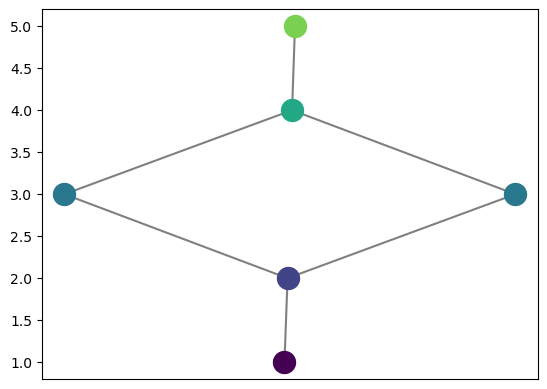

In [ ]:
# Version with an example graph 
H = graph_ex.torus_graph()
G = Reeb(H, seed = 48864)

# G.set_pos_from_f()

G.pos_f

G.draw()

<Axes: >

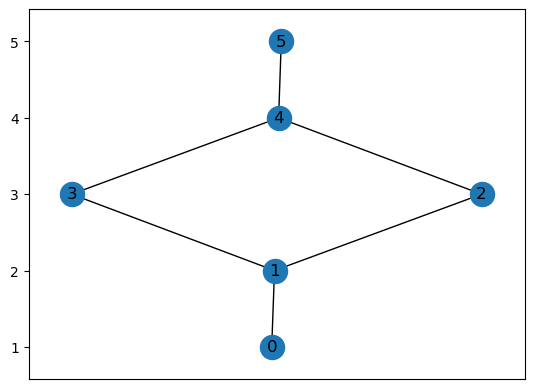

In [ ]:
G.draw_straight_line(with_labels = True)

In [ ]:
for v in G.neighbors(2):
    print(v)

1
4


In [ ]:
G.adjacency()

In [ ]:
# Version with an empty graph initialized

G = Reeb()

len(G.nodes)

0